<a href="https://colab.research.google.com/github/ValenC25/Taller-Graficos/blob/main/TP1/An%C3%A1lisis_de_Datos_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!git clone https://github.com/ChenaoB/Laboratorios_Estadistica_basica.git

fatal: destination path 'Laboratorios_Estadistica_basica' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np

file_path = '/content/Laboratorios_Estadistica_basica/iris.csv'
data = pd.read_csv(file_path)
data



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.info() #muestra la información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data['species'].unique() # muestra valores únicos

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
data.shape # muestra el número filas y columnas para saber si hay campos nulos

(150, 5)

In [7]:
data.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


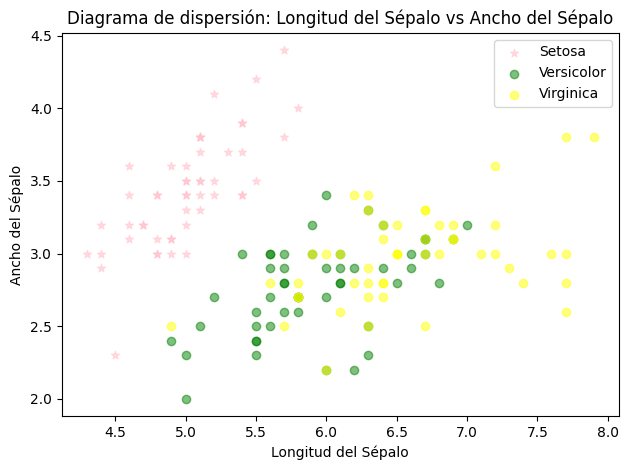

In [8]:
import matplotlib.pyplot as plt # realiza gráficos

grupos = data.groupby('species')
datos_setosa = grupos.get_group('setosa')
datos_versicolor = grupos.get_group('versicolor')
datos_virginica = grupos.get_group('virginica')

#gráfico de dispersión scatter
plt.scatter(datos_setosa['sepal_length'],
            datos_setosa['sepal_width'],
            label = 'Setosa',
            alpha = 0.5, # controla la transparencia del elemento, entre más oscuro más superpuestos están uno del otro
            color = 'pink',
            marker = '*') # cambia el estilo de los puntos a *

plt.scatter(datos_versicolor['sepal_length'],
            datos_versicolor['sepal_width'],
            label = 'Versicolor',
            alpha = 0.5,
            color = 'green')

plt.scatter(datos_virginica['sepal_length'],
            datos_virginica['sepal_width'],
            label = 'Virginica', # Label = Etiqueta
            alpha = 0.5,
            color = 'yellow')

plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.title('Diagrama de dispersión: Longitud del Sépalo vs Ancho del Sépalo')
plt.legend() # Muestra la etiqueta
plt.tight_layout() # centra el titúlo en el gráfico
plt.show()

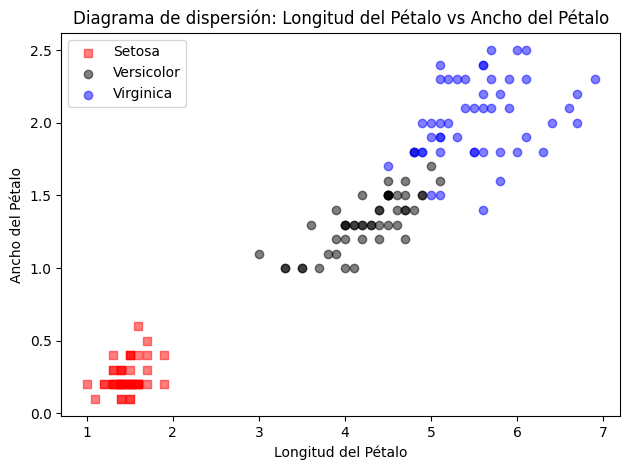

In [9]:
import matplotlib.pyplot as plt # realiza gráficos

grupos = data.groupby('species')
datos_setosa = grupos.get_group('setosa')
datos_versicolor = grupos.get_group('versicolor')
datos_virginica = grupos.get_group('virginica')

#gráfico de dispersión scatter
plt.scatter(datos_setosa['petal_length'],
            datos_setosa['petal_width'],
            label = 'Setosa',
            alpha = 0.5, # controla la transparencia del elemento, entre más oscuro más superpuestos están uno del otro
            color = 'red',
            marker = 's') # cambia el estilo de los puntos a cuadrado

plt.scatter(datos_versicolor['petal_length'],
            datos_versicolor['petal_width'],
            label = 'Versicolor',
            alpha = 0.5,
            color = 'black')

plt.scatter(datos_virginica['petal_length'],
            datos_virginica['petal_width'],
            label = 'Virginica',
            alpha = 0.5, # Label = Etiqueta
            color = 'blue')

plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión: Longitud del Pétalo vs Ancho del Pétalo')
plt.legend() # Muestra la etiqueta
plt.tight_layout() # centra el titúlo en el gráfico
plt.show()



$\overline{X}$ : Media aritmética
- Cálculo de la media aritmética, promedio o valor esperado para la longitud y ancho de la setosa

In [10]:
promedioSetosa = datos_setosa.select_dtypes(include = np.number).mean()
promedioSetosa

,0
sepal_length,5.006
sepal_width,3.428
petal_length,1.462
petal_width,0.246


Representación gráfica del promedio artmético en un diagrama de dispersión

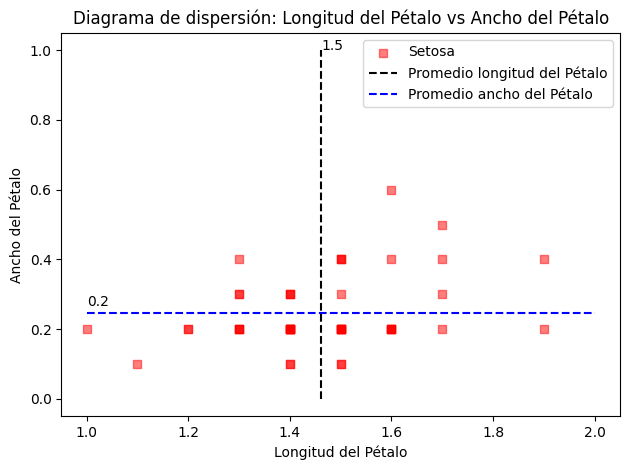

In [11]:
plt.scatter(datos_setosa['petal_length'],
            datos_setosa['petal_width'],
            label = 'Setosa',
            alpha = 0.5,
            color = 'red',
            marker = 's')

plt.vlines(x = promedioSetosa.iloc[2],
           ymin = 0,
           ymax = 1,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Pétalo')

plt.text(promedioSetosa.iloc[2], 1, np.round(promedioSetosa.iloc[2],1))


plt.hlines(y = promedioSetosa.iloc[3],
           xmin = 1,
           xmax = 2,
           linestyles = 'dashed', # linea discontinua
           color = 'blue',
           label = 'Promedio ancho del Pétalo')

plt.text(1, promedioSetosa.iloc[3] + 0.02, np.round(promedioSetosa.iloc[3],1))

plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión: Longitud del Pétalo vs Ancho del Pétalo')
plt.legend()
plt.tight_layout()
plt.show()

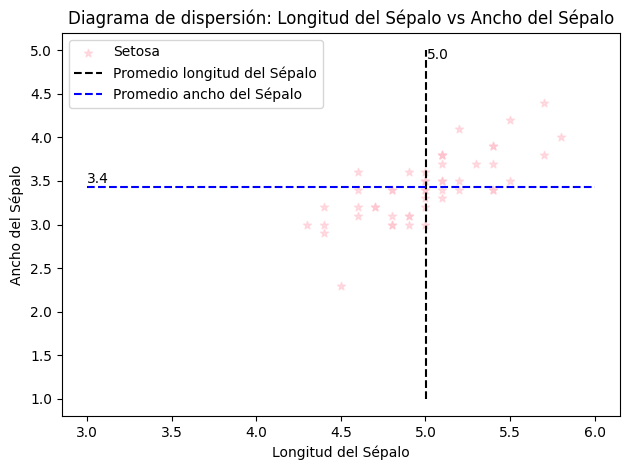

In [12]:
plt.scatter(datos_setosa['sepal_length'],
            datos_setosa['sepal_width'],
            label = 'Setosa',
            alpha = 0.5, # controla la transparencia del elemento, entre más oscuro más superpuestos están uno del otro
            color = 'pink',
            marker = '*') # cambia el estilo de los puntos a *


plt.vlines(x = promedioSetosa.iloc[0],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Sépalo')

plt.text(promedioSetosa.iloc[0], 4.9, np.round(promedioSetosa.iloc[0],1))

plt.hlines(y = promedioSetosa.iloc[1],
           xmin = 3,
           xmax = 6,
           linestyles = 'dashed', # linea discontinua
           color = 'blue',
           label = 'Promedio ancho del Sépalo')

plt.text(3,promedioSetosa.iloc[1] + 0.05, np.round(promedioSetosa.iloc[1],1))

plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.title('Diagrama de dispersión: Longitud del Sépalo vs Ancho del Sépalo')
plt.legend()
plt.tight_layout()
plt.show()

$M_e$:   Mediana

In [13]:
medianaSetosa = datos_setosa.select_dtypes(include = np.number).median()
medianaSetosa

,0
sepal_length,5.0
sepal_width,3.4
petal_length,1.5
petal_width,0.2


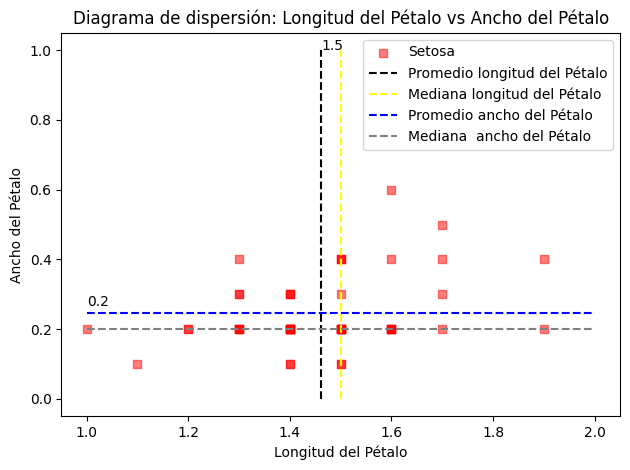

In [14]:
plt.scatter(datos_setosa['petal_length'],
            datos_setosa['petal_width'],
            label = 'Setosa',
            alpha = 0.5,
            color = 'red',
            marker = 's')

plt.vlines(x = promedioSetosa.iloc[2],
           ymin = 0,
           ymax = 1,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Pétalo')

plt.vlines(x = medianaSetosa.iloc[2],
           ymin = 0,
           ymax = 1,
           linestyles = 'dashed', # linea discontinua
           color = 'yellow',
           label = 'Mediana longitud del Pétalo')

plt.text(promedioSetosa.iloc[2], 1, np.round(promedioSetosa.iloc[2],1))


plt.hlines(y = promedioSetosa.iloc[3],
           xmin = 1,
           xmax = 2,
           linestyles = 'dashed', # linea discontinua
           color = 'blue',
           label = 'Promedio ancho del Pétalo')

plt.hlines(y = medianaSetosa.iloc[3],
           xmin = 1,
           xmax = 2,
           linestyles = 'dashed', # linea discontinua
           color = 'gray',
           label = 'Mediana  ancho del Pétalo')

plt.text(1, promedioSetosa.iloc[3] + 0.02, np.round(promedioSetosa.iloc[3],1))

plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión: Longitud del Pétalo vs Ancho del Pétalo')
plt.legend()
plt.tight_layout()
plt.show()

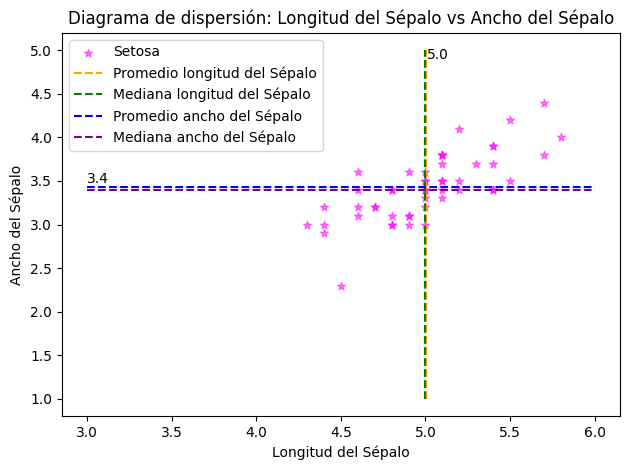

In [15]:
plt.scatter(datos_setosa['sepal_length'],
            datos_setosa['sepal_width'],
            label = 'Setosa',
            alpha = 0.5, # controla la transparencia del elemento, entre más oscuro más superpuestos están uno del otro
            color = 'magenta',
            marker = '*') # cambia el estilo de los puntos a *


plt.vlines(x = promedioSetosa.iloc[0],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'orange',
           label = 'Promedio longitud del Sépalo')

plt.vlines(x = medianaSetosa.iloc[0],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'green',
           label = 'Mediana longitud del Sépalo')


plt.text(promedioSetosa.iloc[0], 4.9, np.round(promedioSetosa.iloc[0],1))

plt.hlines(y = promedioSetosa.iloc[1],
           xmin = 3,
           xmax = 6,
           linestyles = 'dashed', # linea discontinua
           color = 'blue',
           label = 'Promedio ancho del Sépalo')

plt.hlines(y = medianaSetosa.iloc[1],
           xmin = 3,
           xmax = 6,
           linestyles = 'dashed', # linea discontinua
           color = 'purple',
           label = 'Mediana ancho del Sépalo')

plt.text(3,promedioSetosa.iloc[1] + 0.05, np.round(promedioSetosa.iloc[1],1))

plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.title('Diagrama de dispersión: Longitud del Sépalo vs Ancho del Sépalo')
plt.legend()
plt.tight_layout()
plt.show()

$M_d$ : Moda

In [16]:
modaSetosa = datos_setosa.select_dtypes(include = np.number).mode()
modaSetosa = modaSetosa.loc[0,:]
modaSetosa

,0
sepal_length,5.0
sepal_width,3.4
petal_length,1.4
petal_width,0.2


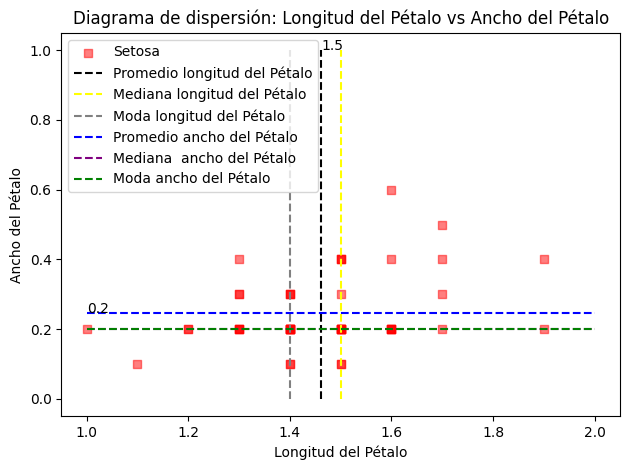

In [17]:
plt.scatter(datos_setosa['petal_length'],
            datos_setosa['petal_width'],
            label = 'Setosa',
            alpha = 0.5,
            color = 'red',
            marker = 's')

plt.vlines(x = promedioSetosa.iloc[2],
           ymin = 0,
           ymax = 1,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Pétalo')

plt.text(promedioSetosa.iloc[2], 1, np.round(promedioSetosa.iloc[2],1))

plt.vlines(x = medianaSetosa.iloc[2],
           ymin = 0,
           ymax = 1,
           linestyles = 'dashed', # linea discontinua
           color = 'yellow',
           label = 'Mediana longitud del Pétalo')

plt.vlines(x = modaSetosa.iloc[2],
           ymin = 0,
           ymax = 1,
           linestyles = 'dashed', # linea discontinua
           color = 'gray',
           label = 'Moda longitud del Pétalo')


plt.hlines(y = promedioSetosa.iloc[3],
           xmin = 1,
           xmax = 2,
           linestyles = 'dashed', # linea discontinua
           color = 'blue',
           label = 'Promedio ancho del Pétalo')

plt.text(1, promedioSetosa.iloc[3] + 0, np.round(promedioSetosa.iloc[3],1))

plt.hlines(y = medianaSetosa.iloc[3],
           xmin = 1,
           xmax = 2,
           linestyles = 'dashed', # linea discontinua
           color = 'purple',
           label = 'Mediana  ancho del Pétalo')

plt.hlines(y = modaSetosa.iloc[3],
           xmin = 1,
           xmax = 2,
           linestyles = 'dashed', # linea discontinua
           color = 'green',
           label = 'Moda ancho del Pétalo')


plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión: Longitud del Pétalo vs Ancho del Pétalo')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
promedioVersicolor = datos_versicolor.select_dtypes(include = np.number).mean()
promedioVersicolor

,0
sepal_length,5.936
sepal_width,2.770
petal_length,4.260
petal_width,1.326


In [19]:
medianaVersicolor = datos_versicolor.select_dtypes(include = np.number).median()
medianaVersicolor

,0
sepal_length,5.90
sepal_width,2.80
petal_length,4.35
petal_width,1.30


In [20]:
modaVersicolor = datos_versicolor.select_dtypes(include = np.number).mode()
modaVersicolor = modaVersicolor.loc[0,:]
modaVersicolor

,0
sepal_length,5.5
sepal_width,3.0
petal_length,4.5
petal_width,1.3


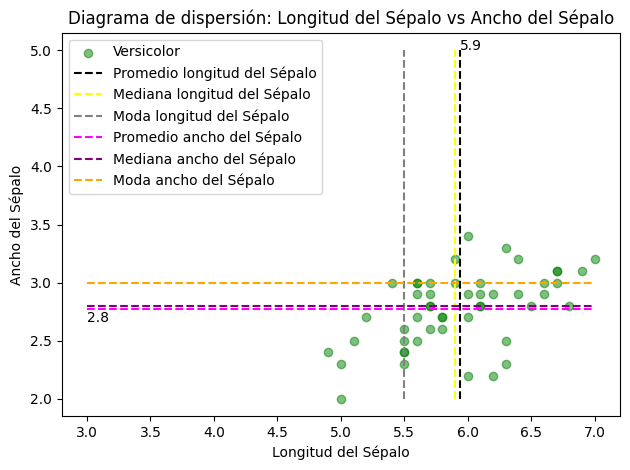

In [21]:
plt.scatter(datos_versicolor['sepal_length'],
            datos_versicolor['sepal_width'],
            label = 'Versicolor',
            alpha = 0.5,
            color = 'green')

plt.vlines(x = promedioVersicolor.iloc[0],
           ymin = 2,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Sépalo')

plt.text(promedioVersicolor.iloc[0],5, np.round(promedioVersicolor.iloc[0],1))

plt.vlines(x = medianaVersicolor.iloc[0],
           ymin = 2,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'yellow',
           label = 'Mediana longitud del Sépalo')

plt.vlines(x = modaVersicolor.iloc[0],
           ymin = 2,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'gray',
           label = 'Moda longitud del Sépalo')


plt.hlines(y = promedioVersicolor.iloc[1],
           xmin = 3,
           xmax = 7,
           linestyles = 'dashed', # linea discontinua
           color = 'magenta',
           label = 'Promedio ancho del Sépalo')

plt.text(3, promedioVersicolor.iloc[1] - 0.11, np.round(promedioVersicolor.iloc[1],1))


plt.hlines(y = medianaVersicolor.iloc[1],
           xmin = 3,
           xmax = 7,
           linestyles = 'dashed', # linea discontinua
           color = 'purple',
           label = 'Mediana ancho del Sépalo')

plt.hlines(y = modaVersicolor.iloc[1],
           xmin = 3,
           xmax = 7,
           linestyles = 'dashed', # linea discontinua
           color = 'orange',
           label = 'Moda ancho del Sépalo')



plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.title('Diagrama de dispersión: Longitud del Sépalo vs Ancho del Sépalo')
plt.legend()
plt.tight_layout()
plt.show()


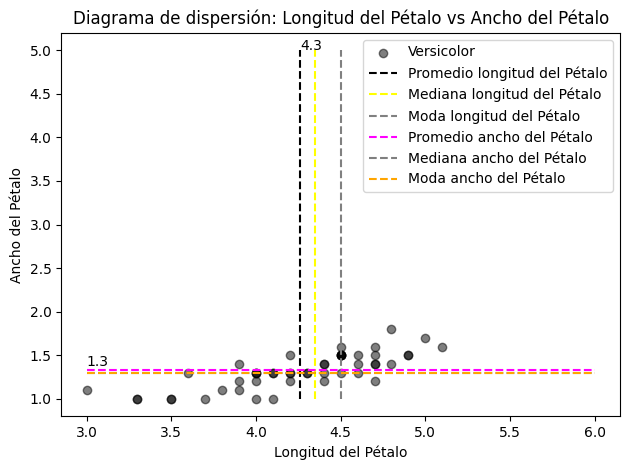

In [22]:
plt.scatter(datos_versicolor['petal_length'],
            datos_versicolor['petal_width'],
            label = 'Versicolor',
            alpha = 0.5,
            color = 'black')

plt.vlines(x = promedioVersicolor.iloc[2],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Pétalo')

plt.text(promedioVersicolor.iloc[2],5, np.round(promedioVersicolor.iloc[2], 1))

plt.vlines(x = medianaVersicolor.iloc[2],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'yellow',
           label = 'Mediana longitud del Pétalo')

plt.vlines(x = modaVersicolor.iloc[2],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'gray',
           label = 'Moda longitud del Pétalo')


plt.hlines(y = promedioVersicolor.iloc[3],
           xmin = 3,
           xmax = 6,
           linestyles = 'dashed', # linea discontinua
           color = 'magenta',
           label = 'Promedio ancho del Pétalo')

plt.text(3, promedioVersicolor.iloc[3] +0.05, np.round(promedioVersicolor.iloc[3],1))


plt.hlines(y = medianaVersicolor.iloc[3],
           xmin = 3,
           xmax = 6,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           alpha = 0.5,
           label = 'Mediana ancho del Pétalo')

plt.hlines(y = modaVersicolor.iloc[3],
           xmin = 3,
           xmax = 6,
           linestyles = 'dashed', # linea discontinua
           color = 'orange',
           label = 'Moda ancho del Pétalo')



plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión: Longitud del Pétalo vs Ancho del Pétalo')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
promedioVirginica = datos_virginica.select_dtypes(include = np.number).mean()
promedioVirginica

,0
sepal_length,6.588
sepal_width,2.974
petal_length,5.552
petal_width,2.026


In [24]:
medianaVirginica = datos_virginica.select_dtypes(include = np.number).median()
medianaVirginica

,0
sepal_length,6.50
sepal_width,3.00
petal_length,5.55
petal_width,2.00


In [25]:
modaViginica = datos_virginica.select_dtypes(include = np.number).mode()
modaViginica = modaViginica.loc[0,:]
modaViginica

,0
sepal_length,6.3
sepal_width,3.0
petal_length,5.1
petal_width,1.8


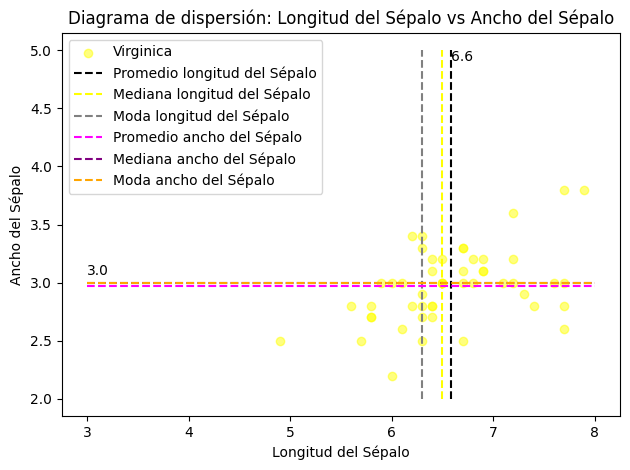

In [26]:
plt.scatter(datos_virginica['sepal_length'],
            datos_virginica['sepal_width'],
            label = 'Virginica', # Label = Etiqueta
            alpha = 0.5,
            color = 'yellow')

plt.vlines(x = promedioVirginica.iloc[0],
           ymin = 2,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Sépalo')

plt.text(promedioVirginica.iloc[0],4.91, np.round(promedioVirginica.iloc[0],1))

plt.vlines(x = medianaVirginica.iloc[0],
           ymin = 2,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'yellow',
           label = 'Mediana longitud del Sépalo')

plt.vlines(x = modaViginica.iloc[0],
           ymin = 2,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'gray',
           label = 'Moda longitud del Sépalo')


plt.hlines(y = promedioVirginica.iloc[1],
           xmin = 3,
           xmax = 8,
           linestyles = 'dashed', # linea discontinua
           color = 'magenta',
           label = 'Promedio ancho del Sépalo')

plt.text(3, promedioVirginica.iloc[1] +0.09 , np.round(promedioVirginica.iloc[1],1))


plt.hlines(y = medianaVirginica.iloc[1],
           xmin = 3,
           xmax = 8,
           linestyles = 'dashed', # linea discontinua
           color = 'purple',
           label = 'Mediana ancho del Sépalo')

plt.hlines(y = modaViginica.iloc[1],
           xmin = 3,
           xmax = 8,
           linestyles = 'dashed', # linea discontinua
           color = 'orange',
           label = 'Moda ancho del Sépalo')



plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.title('Diagrama de dispersión: Longitud del Sépalo vs Ancho del Sépalo')
plt.legend()
plt.tight_layout()
plt.show()


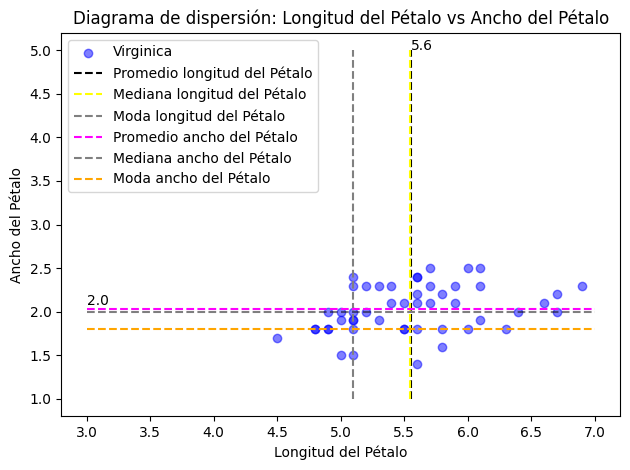

In [27]:
plt.scatter(datos_virginica['petal_length'],
            datos_virginica['petal_width'],
            label = 'Virginica',
            alpha = 0.5, # Label = Etiqueta
            color = 'blue')


plt.vlines(x = promedioVirginica.iloc[2],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           label = 'Promedio longitud del Pétalo')

plt.text(promedioVirginica.iloc[2],5, np.round(promedioVirginica.iloc[2],1))

plt.vlines(x = medianaVirginica.iloc[2],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'yellow',
           label = 'Mediana longitud del Pétalo')

plt.vlines(x = modaViginica.iloc[2],
           ymin = 1,
           ymax = 5,
           linestyles = 'dashed', # linea discontinua
           color = 'gray',
           label = 'Moda longitud del Pétalo')


plt.hlines(y = promedioVirginica.iloc[3],
           xmin = 3,
           xmax = 7,
           linestyles = 'dashed', # linea discontinua
           color = 'magenta',
           label = 'Promedio ancho del Pétalo')

plt.text(3,promedioVirginica.iloc[3]+0.05, np.round(promedioVirginica.iloc[3],1))


plt.hlines(y = medianaVirginica.iloc[3],
           xmin = 3,
           xmax = 7,
           linestyles = 'dashed', # linea discontinua
           color = 'black',
           alpha = 0.5,
           label = 'Mediana ancho del Pétalo')

plt.hlines(y = modaViginica.iloc[3],
           xmin = 3,
           xmax = 7,
           linestyles = 'dashed', # linea discontinua
           color = 'orange',
           label = 'Moda ancho del Pétalo')



plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Diagrama de dispersión: Longitud del Pétalo vs Ancho del Pétalo')
plt.legend()
plt.tight_layout()
plt.show()